<a href="https://colab.research.google.com/github/IdaSharonJ/Python-exercises/blob/main/07_SEP_Breastcancer_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
#!wget helps in downloading files directly from the main server
!wget https://raw.githubusercontent.com/a-forty-two/CGI-DPplusPy/main/breastcancer_data.csv

--2022-09-07 07:23:03--  https://raw.githubusercontent.com/a-forty-two/CGI-DPplusPy/main/breastcancer_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80005 (78K) [text/plain]
Saving to: ‘breastcancer_data.csv.1’

breastcancer_data.c 100%[===================>]  78.13K  --.-KB/s    in 0.004s  

2022-09-07 07:23:03 (17.4 MB/s) - ‘breastcancer_data.csv.1’ saved [80005/80005]



In [106]:
#!ls returns the list of file names and directories in the path specified
!ls

blah.txt  breastcancer_data.csv  breastcancer_data.csv.1  hype.txt  sample_data


In [117]:
df = pandas.read_csv('breastcancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [118]:
df['area_mean']

0       1001.0
1       1326.0
2       1203.0
3        386.1
4       1297.0
         ...  
1133    1479.0
1134    1261.0
1135     858.1
1136    1265.0
1137     181.0
Name: area_mean, Length: 1138, dtype: float64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1138 non-null   int64  
 1   diagnosis               1138 non-null   object 
 2   radius_mean             1138 non-null   float64
 3   texture_mean            1138 non-null   float64
 4   perimeter_mean          1138 non-null   float64
 5   area_mean               1138 non-null   float64
 6   smoothness_mean         1138 non-null   float64
 7   compactness_mean        1138 non-null   float64
 8   concavity_mean          1138 non-null   float64
 9   symmetry_mean           1138 non-null   float64
 10  fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 97.9+ KB


In [120]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,1.138000e+03,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000,1138.000000
mean,1.523243e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.181162,0.062798
std,8.965268e+07,3.522499,4.299144,24.288293,351.759340,0.014058,0.052790,0.079685,0.027402,0.007057
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960
25%,9.299525e+04,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.161900,0.057700
50%,9.327950e+04,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.179200,0.061540
75%,9.060125e+05,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.195700,0.066120
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440


In [121]:
df.isna

<bound method DataFrame.isna of             id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M        17.99         10.38          122.80   
1       842517         M        20.57         17.77          132.90   
2     84300903         M        19.69         21.25          130.00   
3     84348301         M        11.42         20.38           77.58   
4     84358402         M        20.29         14.34          135.10   
...        ...       ...          ...           ...             ...   
1133     93316         M        21.56         22.39          142.00   
1134     93317         M        20.13         28.25          131.20   
1135     93318         M        16.60         28.08          108.30   
1136     93319         M        20.60         29.33          140.10   
1137     93320         B         7.76         24.54           47.92   

      area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        1001.0          0.11840           0.

In [122]:
df.nunique

<bound method DataFrame.nunique of             id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M        17.99         10.38          122.80   
1       842517         M        20.57         17.77          132.90   
2     84300903         M        19.69         21.25          130.00   
3     84348301         M        11.42         20.38           77.58   
4     84358402         M        20.29         14.34          135.10   
...        ...       ...          ...           ...             ...   
1133     93316         M        21.56         22.39          142.00   
1134     93317         M        20.13         28.25          131.20   
1135     93318         M        16.60         28.08          108.30   
1136     93319         M        20.60         29.33          140.10   
1137     93320         B         7.76         24.54           47.92   

      area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        1001.0          0.11840          

# **Visualizations**

**BAR PLOT**

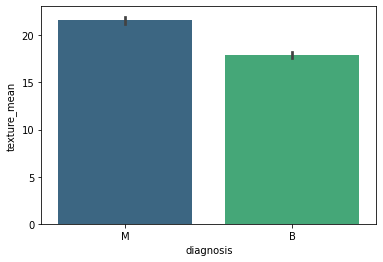

In [144]:
sns.barplot(x='diagnosis', y='texture_mean', data=df, palette='viridis')

**COUNT PLOT**

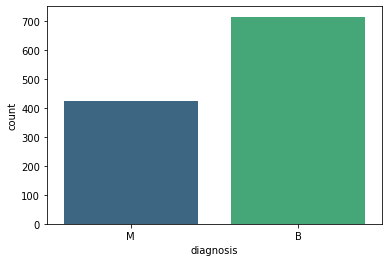

In [125]:
sns.countplot(x='diagnosis', data=df, palette='viridis')

* There are 700 entries for Benign
* There are 400 entries for Malignant

**STRIP PLOT**

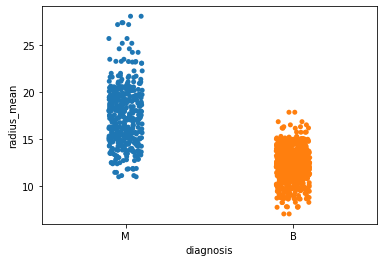

In [126]:
sns.stripplot(x='diagnosis',y='radius_mean',data=df);

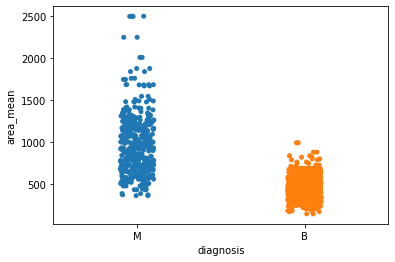

In [127]:
sns.stripplot(x='diagnosis',y='area_mean',data=df);

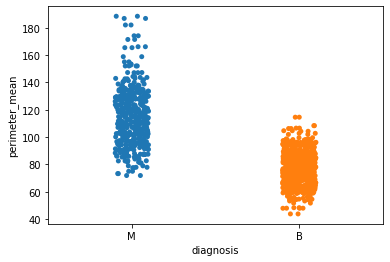

In [128]:
sns.stripplot(x='diagnosis',y='perimeter_mean',data=df);

**SWARM PLOT**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


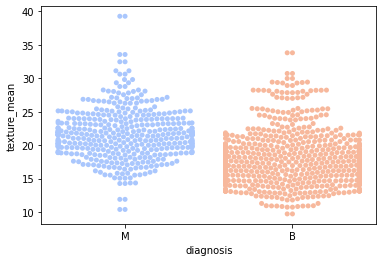

In [129]:
sns.swarmplot(x='diagnosis', y='texture_mean', data=df, palette='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


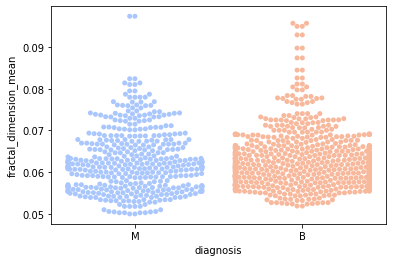

In [133]:
sns.swarmplot(x='diagnosis', y='fractal_dimension_mean', data=df, palette='coolwarm')

**SCATTER PLOT**

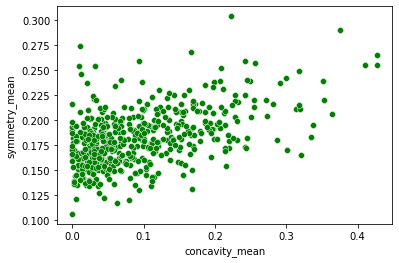

In [131]:
sns.scatterplot(x='concavity_mean', y='symmetry_mean', data=df, color='green')

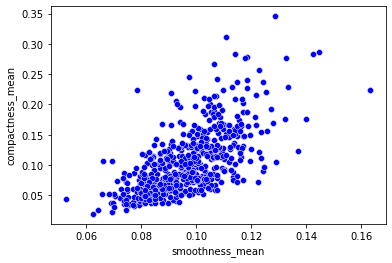

In [132]:
sns.scatterplot(x='smoothness_mean', y='compactness_mean', data=df, color='blue')

**JOINT PLOT**

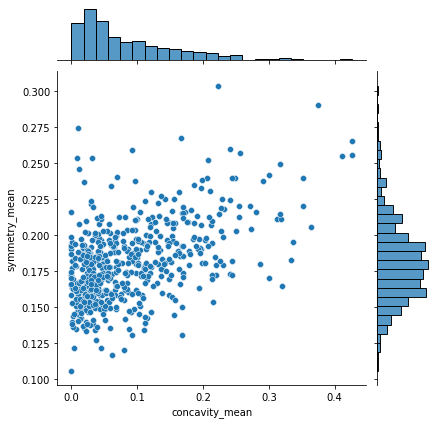

In [134]:
sns.jointplot(x='concavity_mean',y='symmetry_mean',data = df);

**LINE PLOT**

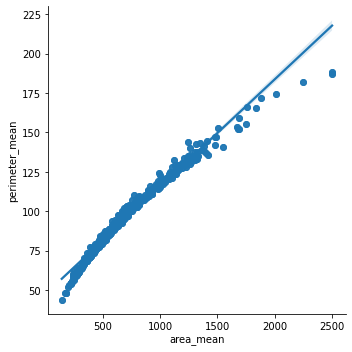

In [138]:
sns.lmplot(x='area_mean', y='perimeter_mean', data=df)

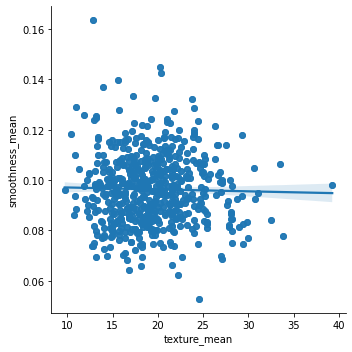

In [139]:
sns.lmplot(x='texture_mean', y='smoothness_mean', data=df)

**VIOLIN PLOT**

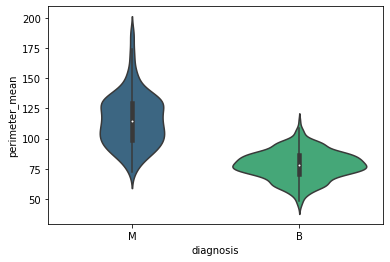

In [141]:
sns.violinplot(x='diagnosis', y='perimeter_mean', data=df, palette='viridis')

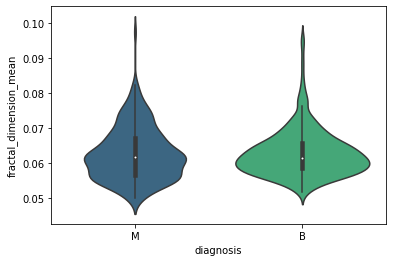

In [142]:
sns.violinplot(x='diagnosis', y='fractal_dimension_mean', data=df, palette='viridis')

**HEAT MAP**

In [145]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.052010,0.069534,0.050988,0.067529,-0.009038,0.000067,0.034903,-0.015412,-0.036598
radius_mean,0.052010,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.147741,-0.311631
texture_mean,0.069534,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437
perimeter_mean,0.050988,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027,-0.261477
area_mean,0.067529,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110
smoothness_mean,-0.009038,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792
compactness_mean,0.000067,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369
concavity_mean,0.034903,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783
symmetry_mean,-0.015412,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921
fractal_dimension_mean,-0.036598,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000


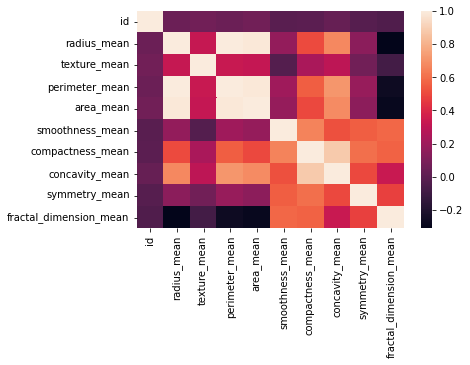

In [146]:
sns.heatmap(df.corr())

**KERNEL DISTRIBUTION ESTIMATION PLOT**



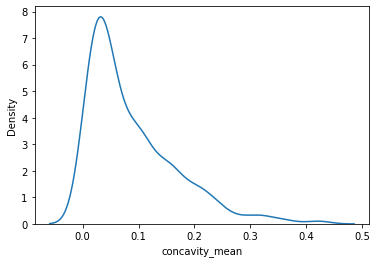

In [148]:
sns.kdeplot(df['concavity_mean'])

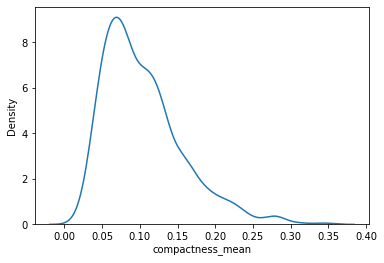

In [149]:
sns.kdeplot(df['compactness_mean'])

**RUG PLOT**

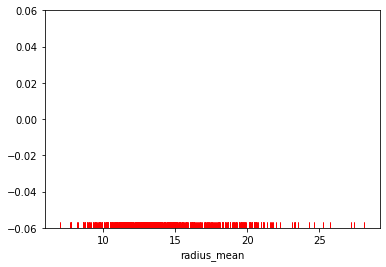

In [151]:
sns.rugplot(df['radius_mean'],color='red')

**PAIR PLOT**

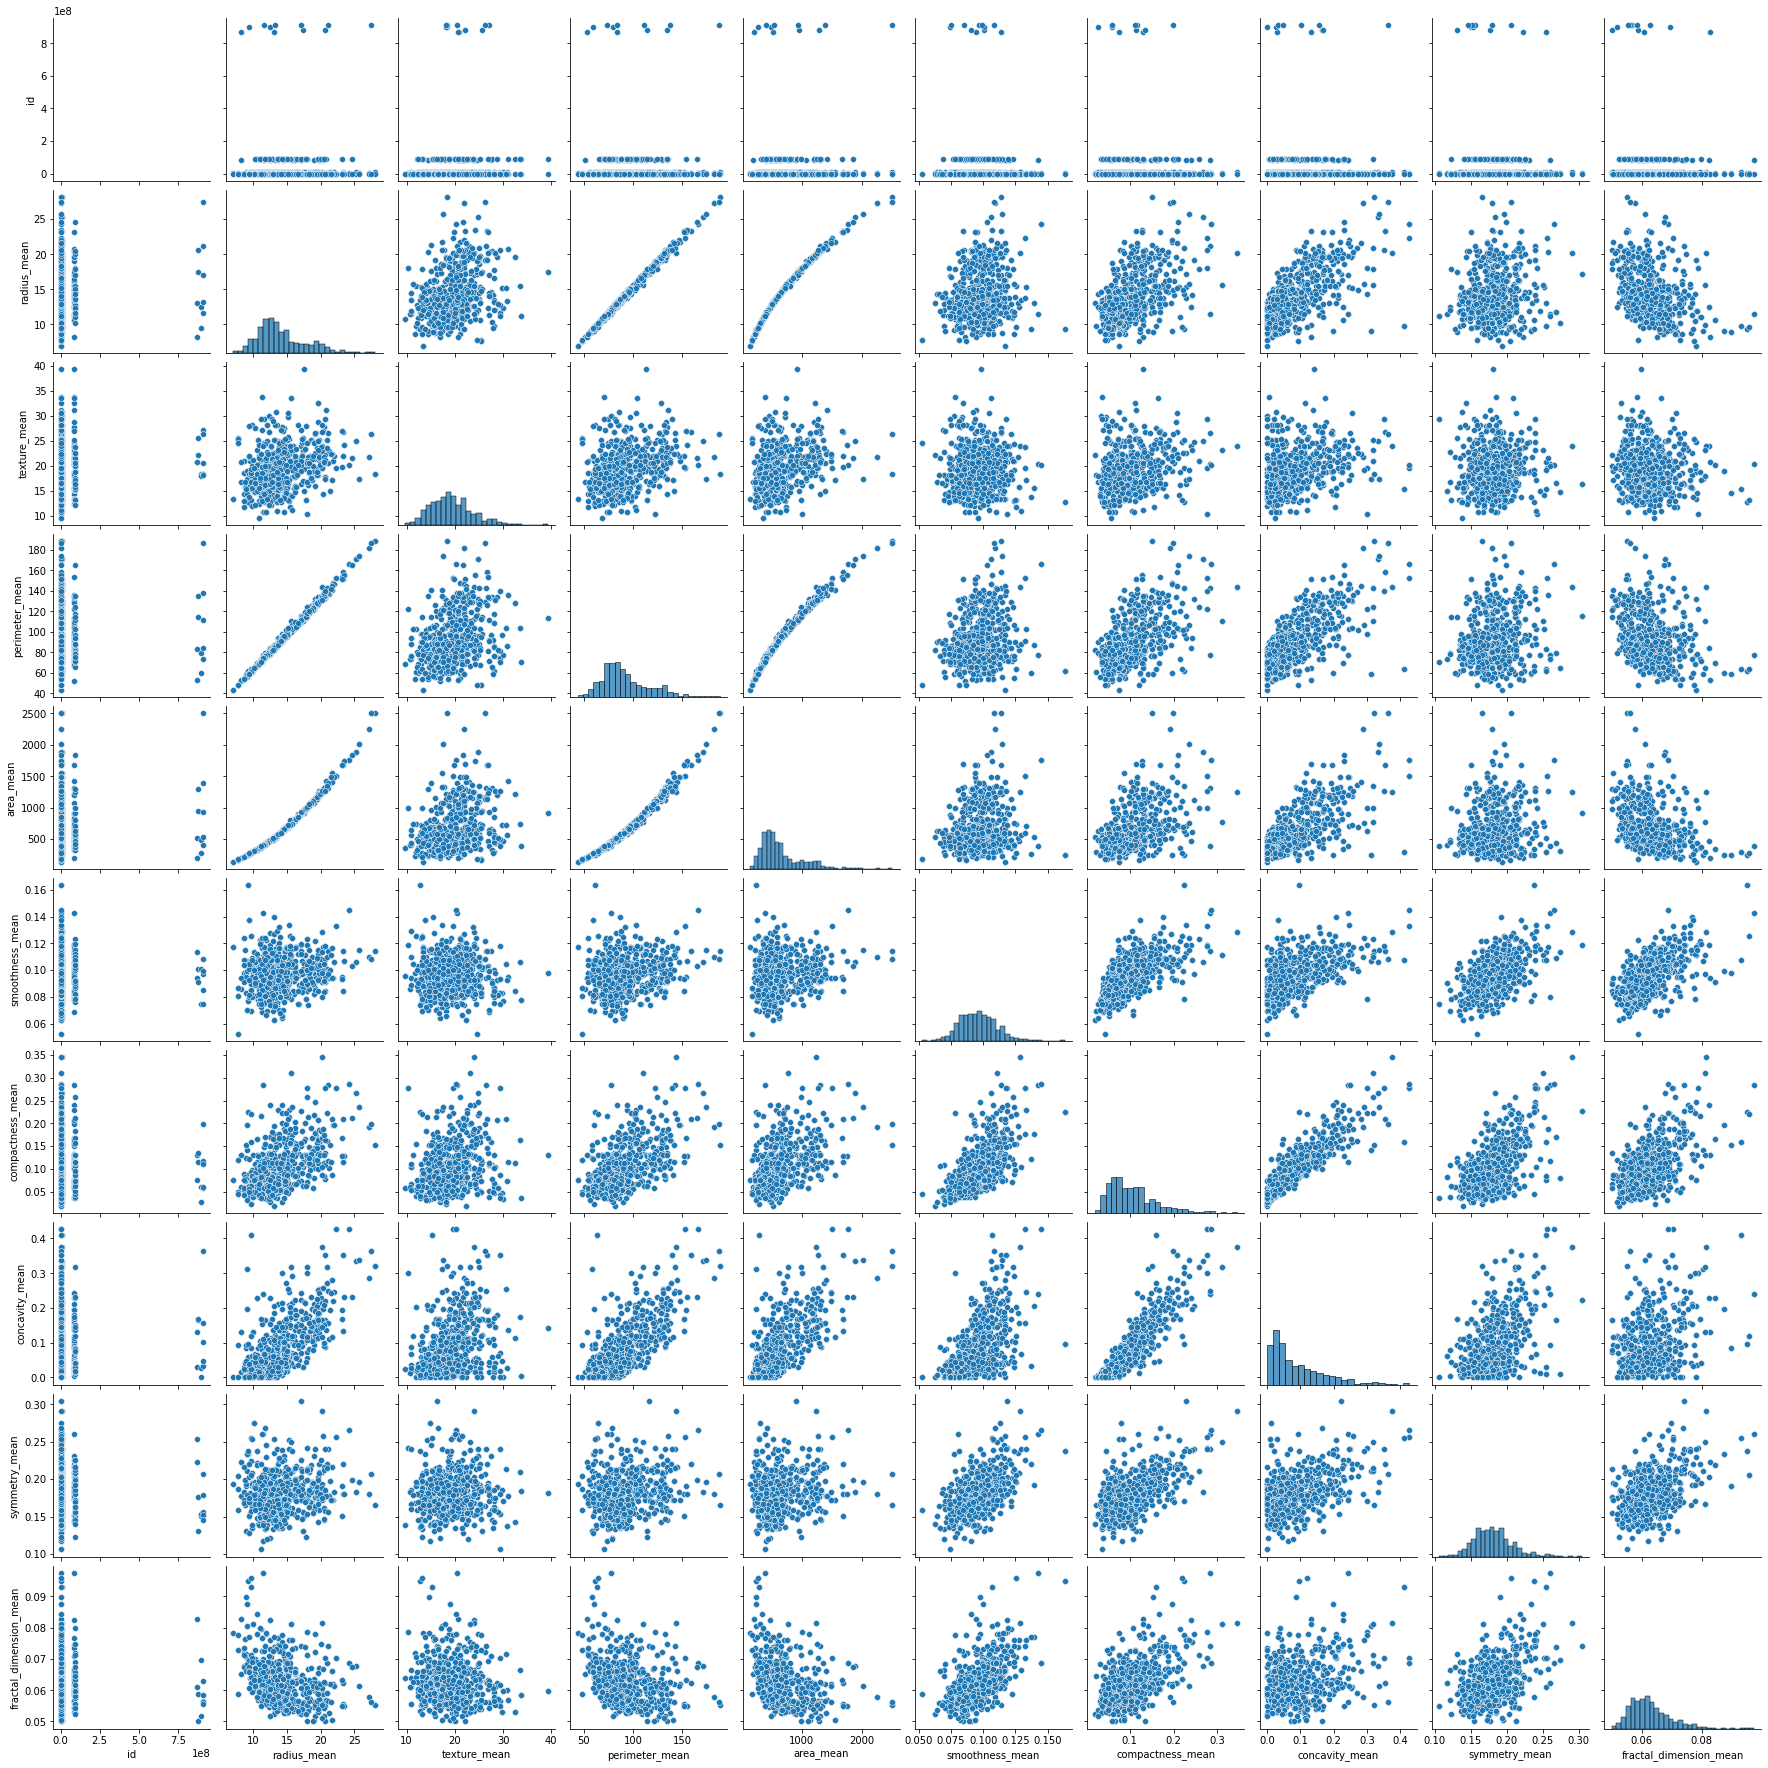

In [147]:
sns.pairplot(df)

**FUNCTIONS**

In [3]:
def blur(val1,val2):
  return val1*val2

In [4]:
blur(3,2)

6

In [14]:
def jupiter(val1,val2):
  return val1+val2+val1

In [15]:
jupiter("home","sweet")

'homesweethome'

This can only concatenate string with string and interger with interger.
Cannot concatenate string and integer.

In [24]:
text = open('hype.txt', 'wt') # r/w/a , text mode or binary mode
text.write(jupiter("hello","world"))
text.close()
text

<_io.TextIOWrapper name='hype.txt' mode='wt' encoding='UTF-8'>

In [50]:
#List
mylist = [126, 0.72727, 'happy birthday', '<input type="str">Click here</input>', True]

In [51]:
#Once the list is created, it's order does not change
mylist

[126, 0.72727, 'happy birthday', '<input type="str">Click here</input>', True]

In [54]:
#call the first element from the list
mylist[0]

126

In [57]:
#call the third element from the list
mylist[2]

'happy birthday'

In [56]:
#call the last element from the list
mylist[-1]

True

In [71]:
notmylist = [200,-45,mylist,'i care']

In [72]:
notmylist #nested list

[200,
 -45,
 [126,
  0.72727,
  'happy birthday',
  '<input type="str">Click here</input>',
  True],
 'i care']

In [73]:
lists = [12,-89,[mylist]]
lists

[12,
 -89,
 [[126,
   0.72727,
   'happy birthday',
   '<input type="str">Click here</input>',
   True]]]

In [78]:
bandook = [ 1, 84, 2, 10, 2, 1, 'boomer', 599, True, 4.926, 'eruma']
setone = set(bandook)
setone

{1, 10, 2, 4.926, 599, 84, 'boomer', 'eruma'}

Set is undefined. We cannot perform indexing in a set.
Set is unhashable too.

In [80]:
tup = (19,28,33) 
tup

(19, 28, 33)

Tuple is read only data. It cannot be modified after creating.

In [81]:
print(mylist)
del mylist[-2]
print(mylist)

[126, 0.72727, 'happy birthday', '<input type="str">Click here</input>', True]
[126, 0.72727, 'happy birthday', True]


In [88]:
diction = {67:"bloom", 4.14:"wide", False:True, 'day':'everyday'}
diction[False]

True

In [89]:
diction[67]

'bloom'

Dictionaries are not ordered but they are indexed.

Dictionaries are indexed by their keys.

In [93]:
def divide(a,b):
  q = int(a/b) 
  r = a%b
  return q,r 

a,b = divide(300,7)
print(a,b)

42 6


In [94]:
convert_to_kelvin = lambda x: x+273
convert_to_kelvin(600)

873

In [98]:
y = lambda x,y,z: x*y + z
y(3,2,11)

17

In [99]:
for i in [21,31,41,51,61,71,81,91]:
  print(i)

21
31
41
51
61
71
81
91


In [104]:
#for iterates only in list
for i in mylist:
  print(i)

126
0.72727
happy birthday
True


In [103]:
#counter is a subclass which is used to count hashable objects
counter = len(mylist) -1
while(counter>=0):
  print(mylist[counter])
  counter = counter - 1

True
happy birthday
0.72727
126


In [158]:
rvalues = [ str(i)+'time' for i in mylist]
rvalues

['126time', '0.72727time', 'happy birthdaytime', 'Truetime']

In [163]:
b = [ i for i in range(5)]
b

[0, 1, 2, 3, 4]

In [164]:
sq = [ i*i for i in b]
sq

[0, 1, 4, 9, 16]

In [165]:
def mathpower(y):
  return lambda x: x**y

squares = mathpower(2)
cube = mathpower(3)

In [166]:
squares(90)

8100

In [168]:
cube(32)

32768

In [171]:
class my_class:
  def juslikethat(): 
    return 'thank you'
  def iamfree(this): 
    return 'hip hip hurray'

In [172]:
obj = my_class()  
print(obj.iamfree()) 
print(obj.justlikethat())

hip hip hurray


AttributeError: ignored

In [176]:
class people:
  def __init__(this):
    this.name = "Ida Sharon"
    this.age = 20
    this.family = 'nuclear'
    this.emotionStatus = True
  def setNewProperties(this, name, age):
    this.name = name
    this.age = age
  def getPeopleProperties(this):
    return this.name, this.age, this.family, ("Happy" if this.emotionStatus==True else "Sad")

In [177]:
estatus = people()
estatus.getPeopleProperties()

('Ida Sharon', 20, 'nuclear', 'Happy')

In [178]:
class xyz:
  def mul(this, x,y):
    return x*y
  def mul(this, z):
    return z*z

ob = xyz()
print(ob.mul(2))
print(ob.mul(5,4)) 

4


TypeError: ignored

In [180]:
class ArithmeticProg:
  def __iter__(own):
    own.base = 7
    own.step = 3
    return own
  def __next__(own):
    own.base = own.base + own.step
    return own.base 

In [181]:
obj = ArithmeticProg()
i = iter(obj)

In [183]:
for j in range(7):
  print(next(i))

55
58
61
64
67
70
73


In [184]:
class goib:
  def __iter__(goib):
    goib.first = -3
    goib.second = 3
    return goib
  def __next__(goib):
    goib.third = goib.first + goib.second
    goib.first = goib.second  
    goib.second = goib.third

    return goib.third 

In [186]:
i = iter(goib())
for j in range(10):
  print(next(i))

0
3
3
6
9
15
24
39
63
102


In [188]:
marks = [25,21,13,22,20,16,17,8,23,12]
students = ['Jade','Ida','Isaac','Glenn','Junia','Irene','Jade','Isaac','Theo','Ancey']

import pandas as pd 
df = pd.DataFrame(
    {'Students':students,
    'Marks':marks}
)

In [190]:
df.loc[ 0:4, ['Marks']]

,Marks
0,25
1,21
2,13
3,22
4,20


In [192]:
df.iloc[ 0:4, [1]]

,Marks
0,25
1,21
2,13
3,22


In [193]:
df.iloc[:7, :]

,Students,Marks
0,Jade,25
1,Ida,21
2,Isaac,13
3,Glenn,22
4,Junia,20
5,Irene,16
6,Jade,17


In [195]:
df.iloc[:5, :-1]

,Students
0,Jade
1,Ida
2,Isaac
3,Glenn
4,Junia


In [197]:
df.loc[-6:, ['Marks']]

,Marks
0,25
1,21
2,13
3,22
4,20
5,16
6,17
7,8
8,23
9,12
